In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
%matplotlib inline

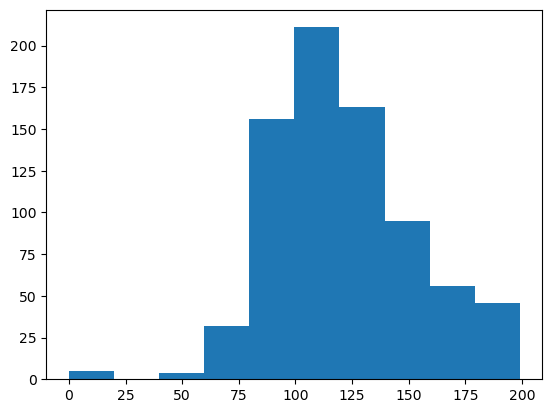

In [6]:
plt.hist(data['Glucose'])
plt.show()

In [11]:
cls = data.columns
cls

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
data[(data['DiabetesPedigreeFunction']==0)].size

0

In [14]:
data[(data['BloodPressure']==0)].shape

(35, 9)

In [26]:
zeroList = []
for i in cls:
    if data[(data[i]==0)].size > 0:
        zeroList.append(i)
print(zeroList)

['Outcome']


In [25]:
for i in zeroList:
    data[i].replace(0,data[i].median(),inplace=True)

In [27]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1


### Scatter Plot {By variant analysis}

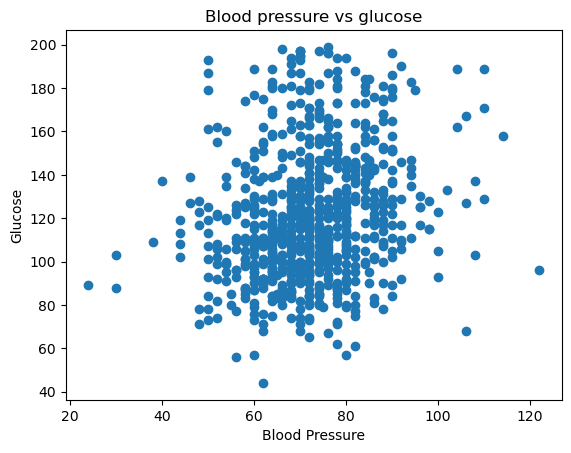

In [28]:
plt.scatter(x=data['BloodPressure'],y=data['Glucose'])
plt.xlabel("Blood Pressure")
plt.ylabel('Glucose')
plt.title("Blood pressure vs glucose")
plt.show()

(array([  3.,   2.,  35., 118., 261., 214., 105.,  18.,  10.,   2.]),
 array([ 24. ,  33.8,  43.6,  53.4,  63.2,  73. ,  82.8,  92.6, 102.4,
        112.2, 122. ]),
 <BarContainer object of 10 artists>)

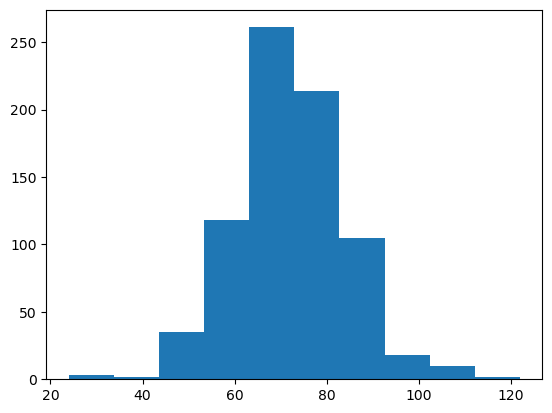

In [31]:
plt.hist(data['BloodPressure'])

In [34]:
data[(data['BloodPressure'] < 40)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
18,1,103,30,38,83.0,43.3,0.183,33,0
125,1,88,30,42,99.0,55.0,0.496,26,1
597,1,89,24,19,25.0,27.8,0.559,21,0
599,1,109,38,18,120.0,23.1,0.407,26,0


<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

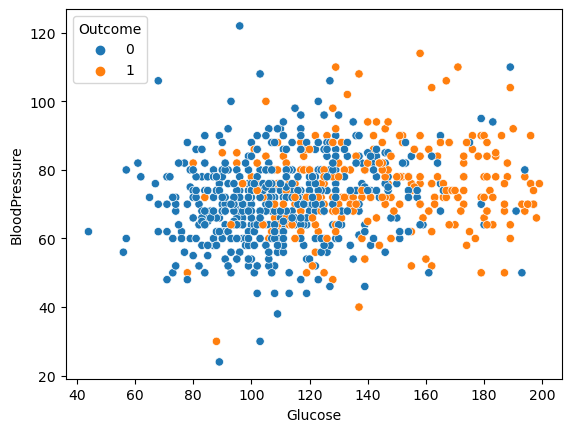

In [36]:
import seaborn as sns
sns.scatterplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)

<AxesSubplot:xlabel='SkinThickness', ylabel='Insulin'>

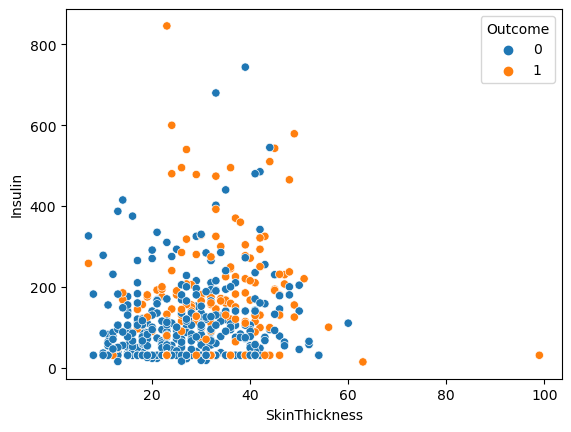

In [37]:
sns.scatterplot(x='SkinThickness',y='Insulin',hue='Outcome',data=data)

In [38]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.149326,0.247530,0.060706,-0.059580,0.080540,-0.016151,0.538169,0.245466
Glucose,0.149326,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.247530,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.060706,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.059580,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.080540,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.016151,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.538169,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.245466,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


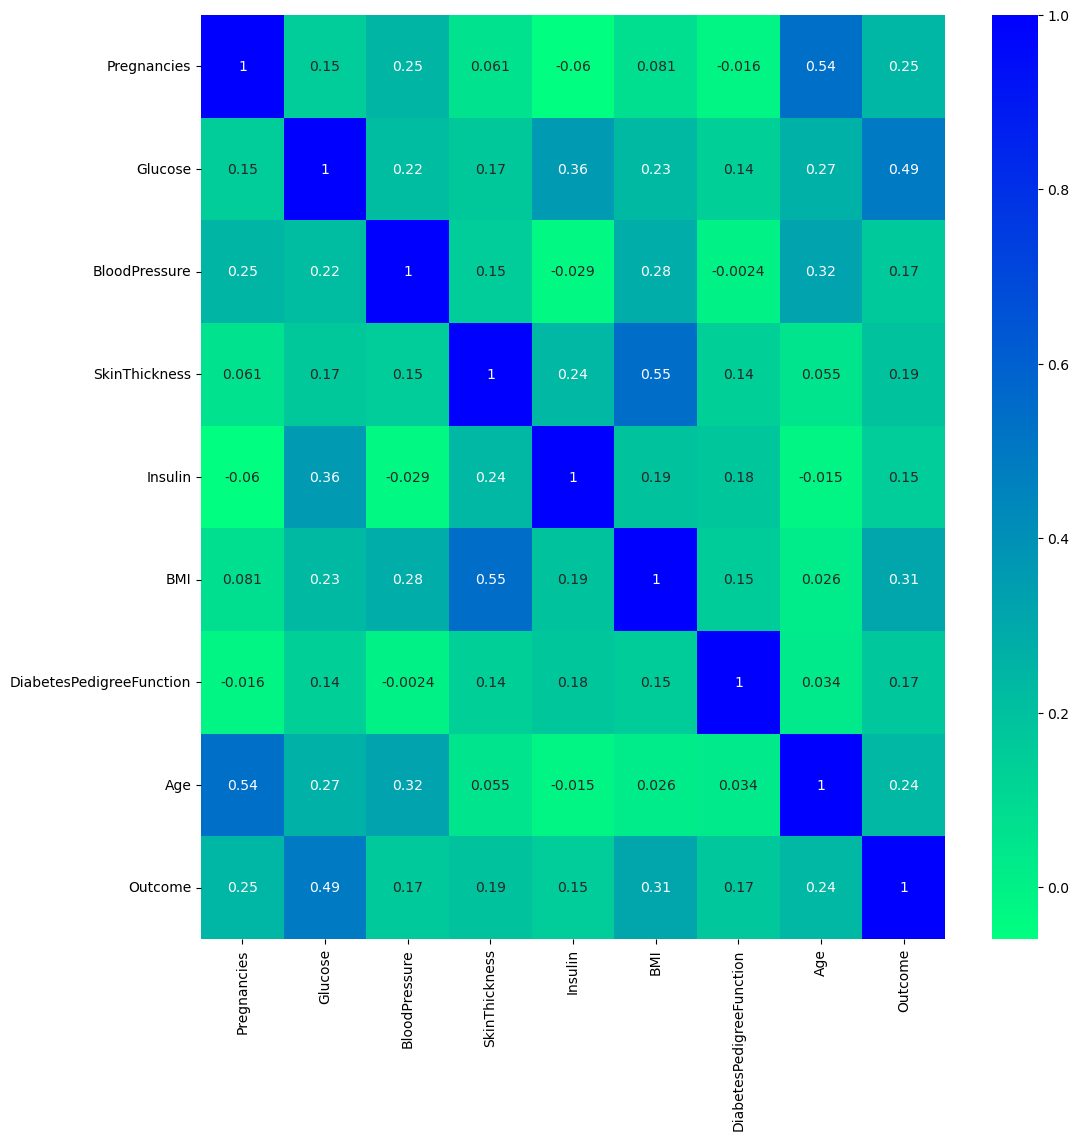

In [42]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,cmap="winter_r")
plt.show()

### Data Modeling

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
#Data Preprocessing
X = data.iloc[:,:-1].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [44]:
y = data.iloc[:,-1].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [45]:
#Spliting data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
X_train.shape

(614, 8)

In [47]:
X_test.shape

(154, 8)

In [48]:
## 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
LogReg_Model = LogisticRegression()

In [52]:
#Training 
LogReg_Model.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred = LogReg_Model.predict(X_test)

In [54]:
#train score 
print('Train Score', LogReg_Model.score(X_train,y_train))
#test score
print('Train Score', LogReg_Model.score(X_test,y_test))

Train Score 0.7882736156351792
Train Score 0.7337662337662337


In [56]:
from sklearn.metrics import confusion_matrix,classification_report
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print("Classification Report \n",classification_report(y_test,y_pred))

Confusion Matrix
 [[84 11]
 [30 29]]
Classification Report 
               precision    recall  f1-score   support

           0       0.74      0.88      0.80        95
           1       0.72      0.49      0.59        59

    accuracy                           0.73       154
   macro avg       0.73      0.69      0.69       154
weighted avg       0.73      0.73      0.72       154



In [57]:
#Prepare ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
prob = LogReg_Model.predict_proba(X)

#select prob for the positive outcome only
prob = prob[:,1]

#Calculate
auc = roc_auc_score(y,prob)
print("ROC AUC SCORE ",auc)

ROC AUC SCORE  0.8417835820895523


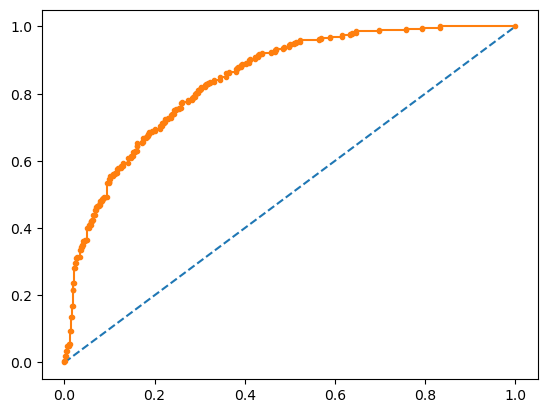

In [58]:
#Calculate roc curve
#Roc is calulate using falsepositiverate(fpr), tpr
fpr, tpr, thresholds = roc_curve(y, prob)
#Plot
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')

In [59]:
# Save the model using joblib(library), pickle(File extension)
import joblib
joblib.dump(LogReg_Model,'LogRegModel.pkl')
print('Model Saved')

Model Saved


In [60]:
#Load the model
Pred_Model = joblib.load('LogRegModel.pkl')
print('Model Loaded')

Model Loaded


In [61]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [68]:
Pregnancies=2
Glucose = 170
BloodPressure = 72
SkinThickness = 40
Insulin = 120
BMI = 25.5
DiabetesPedigreeFunction = 0.35
Age=35
output = Pred_Model.predict([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
       BMI, DiabetesPedigreeFunction, Age]])
print('Person has: ', output)

Person has:  [1]


## 2. Decision Tree

In [71]:
from sklearn import tree

In [72]:
DT_model = tree.DecisionTreeClassifier()
DT_model.fit(X_train,y_train)
DT_y_pred = DT_model.predict(X_test)
print("Decision Tree model Accuracy")
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, DT_y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Decision Tree model Accuracy
Accuracy: 73.38%


## 3. Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy: {:.2f}%".format(rf_accuracy*100))

Accuracy: 77.92%


## 4. SVM

In [82]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm_y_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("Accuracy: {:.2f}%".format(svm_accuracy*100))

Accuracy: 70.13%


# New Data frame and perform ML algorithms

In [84]:
new_df = pd.read_csv('diabetes.csv')
new_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [85]:
new_df.shape

(768, 9)

In [87]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [89]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [90]:
new_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = new_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [91]:
new_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [93]:
new_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [94]:
def median_target(col_name):
    temp = new_df[new_df[col_name].notnull()]
    temp = temp[[col_name, 'Outcome']].groupby(['Outcome'])[[col_name]].median().reset_index()
    return temp

In [96]:
columns = new_df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    new_df.loc[(new_df['Outcome'] == 0 ) & (new_df[i].isnull()), i] = median_target(i)[i][0]
    new_df.loc[(new_df['Outcome'] == 1 ) & (new_df[i].isnull()), i] = median_target(i)[i][1]

In [97]:
new_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,32.0,169.5,34.3,0.232,54,1


In [98]:
new_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Checking Outlier

In [99]:
for feature in new_df:
    Q1 = new_df[feature].quantile(0.25)
    Q3 = new_df[feature].quantile(0.75)
    IQR = Q1-Q3
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    if new_df[(new_df[feature] > upper)].any(axis=None):
        print(feature," Yes")
    else:
        print(feature," No")

Pregnancies  Yes
Glucose  Yes
BloodPressure  Yes
SkinThickness  Yes
Insulin  Yes
BMI  Yes
DiabetesPedigreeFunction  Yes
Age  Yes
Outcome  Yes


In [106]:
Q1 = new_df.Insulin.quantile(0.25)
Q3 = new_df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
new_df.loc[new_df["Insulin"] > upper,"Insulin"] = upper

<AxesSubplot:xlabel='Insulin'>

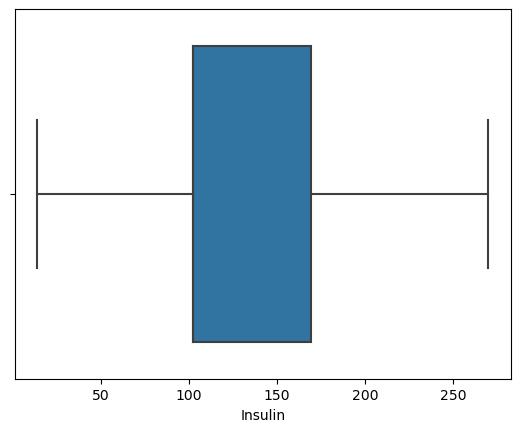

In [107]:
sns.boxplot(x = new_df['Insulin'])

<AxesSubplot:xlabel='Glucose'>

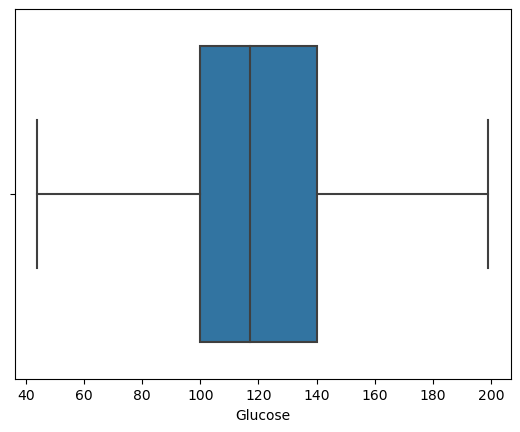

In [101]:
sns.boxplot(x=new_df['Glucose'])

<AxesSubplot:xlabel='Pregnancies'>

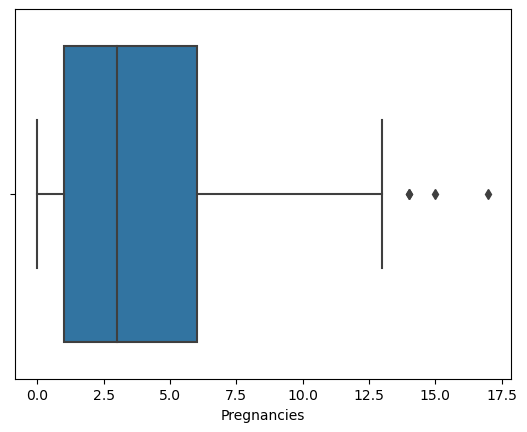

In [102]:
sns.boxplot(x = new_df['Pregnancies'])

In [108]:
Q1 = new_df.Pregnancies.quantile(0.25)
Q3 = new_df.Pregnancies.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 0.15*IQR
upper = Q3 + 0.15*IQR
new_df.loc[new_df['Pregnancies'] > upper, 'Pregnancies'] = upper

<AxesSubplot:xlabel='Pregnancies'>

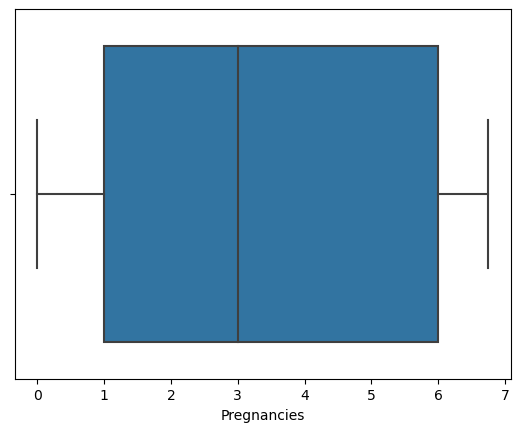

In [109]:
sns.boxplot(x = new_df['Pregnancies'])

## Feature Engineering

In [112]:
NewBMI = pd.Series(["Underweight", "Normal","Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
new_df["NewBMI"] = NewBMI
new_df.loc[new_df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
new_df.loc[(new_df["BMI"] > 18.5) & (new_df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
new_df.loc[(new_df["BMI"] > 24.9) & (new_df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
new_df.loc[(new_df["BMI"] > 29.9) & (new_df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
new_df.loc[(new_df["BMI"] > 34.9) & (new_df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
new_df.loc[new_df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [113]:
def set_insulin(row):
    if row['Insulin'] >=  16 and row['Insulin'] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [114]:
new_df = new_df.assign(NewInsulinScore = new_df.apply(set_insulin, axis=1))

In [116]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"],dtype="category")
new_df["NewGlucose"] = NewGlucose
new_df.loc[new_df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
new_df.loc[(new_df["Glucose"] > 70) & (new_df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
new_df.loc[(new_df["Glucose"] > 99) & (new_df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
new_df.loc[new_df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [117]:
new_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.00,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1.00,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,6.75,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1.00,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0.00,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


## One Hot Encoding

In [118]:
new_df = pd.get_dummies(new_df, columns=['NewBMI','NewInsulinScore','NewGlucose'],drop_first=True)
new_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.00,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0,0,0,0,0,0,0,1
1,1.00,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,0,1,0,1,0,1,0,0
2,6.75,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,0,0,0,0,0,1
3,1.00,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,0,1,0,1,0,1,0,0
4,0.00,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,0,0,0,0,0,0,1


In [119]:
y = new_df["Outcome"]
X = new_df.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
cols = X.columns
index = X.index

In [120]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.00,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1.00,85.0,66.0,29.0,102.5,26.6,0.351,31
2,6.75,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1.00,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0.00,137.0,40.0,35.0,168.0,43.1,2.288,33


In [121]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns=cols,index=index)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.60,0.765432,0.000,1.000000,1.000000,0.170330,0.665359,1.235294
1,-0.40,-0.790123,-0.375,0.142857,0.000000,-0.598901,-0.056209,0.117647
2,0.75,1.629630,-0.500,0.571429,1.000000,-0.961538,0.783007,0.176471
3,-0.40,-0.691358,-0.375,-0.714286,-0.126866,-0.434066,-0.537255,-0.470588
4,-0.60,0.493827,-2.000,1.000000,0.977612,1.214286,5.007843,0.235294


## ML Models

In [124]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('CART', tree.DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
# evaluate each model in turn
results = []
names = []

In [126]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [127]:
for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR 0.798189 (0.039853)
CART 0.843780 (0.023207)
RF 0.884193 (0.033390)
SVM 0.855451 (0.025153)
